In [1]:
import pandas as pd
import numpy as np
from glob import glob

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')

In [2]:
#Reading in Images
dog_files = glob('../input/cat-and-dog/training_set/training_set/cats/*.jpg')
cat_files = glob('../input/cat-and-dog/training_set/training_set/cats/*.jpg')

dog_files
cat_files

['../input/cat-and-dog/training_set/training_set/cats/cat.3498.jpg',
 '../input/cat-and-dog/training_set/training_set/cats/cat.891.jpg',
 '../input/cat-and-dog/training_set/training_set/cats/cat.2842.jpg',
 '../input/cat-and-dog/training_set/training_set/cats/cat.1.jpg',
 '../input/cat-and-dog/training_set/training_set/cats/cat.115.jpg',
 '../input/cat-and-dog/training_set/training_set/cats/cat.3921.jpg',
 '../input/cat-and-dog/training_set/training_set/cats/cat.2939.jpg',
 '../input/cat-and-dog/training_set/training_set/cats/cat.3949.jpg',
 '../input/cat-and-dog/training_set/training_set/cats/cat.3673.jpg',
 '../input/cat-and-dog/training_set/training_set/cats/cat.294.jpg',
 '../input/cat-and-dog/training_set/training_set/cats/cat.1994.jpg',
 '../input/cat-and-dog/training_set/training_set/cats/cat.800.jpg',
 '../input/cat-and-dog/training_set/training_set/cats/cat.3547.jpg',
 '../input/cat-and-dog/training_set/training_set/cats/cat.2453.jpg',
 '../input/cat-and-dog/training_set/train

In [3]:
len(dog_files)

4000

In [4]:
img_mpl = plt.imread(cat_files[20]) #reading files
img_cv2 = cv2.imread(cat_files[20]) #reading files
img_mpl.shape, img_cv2.shape



((232, 350, 3), (232, 350, 3))

In [5]:
img_mpl = plt.imread(cat_files[20])
img_cv2 = cv2.imread(cat_files[20])
img_mpl.shape, img_cv2.shape

((232, 350, 3), (232, 350, 3))

In [6]:
img_mpl.shape

(232, 350, 3)

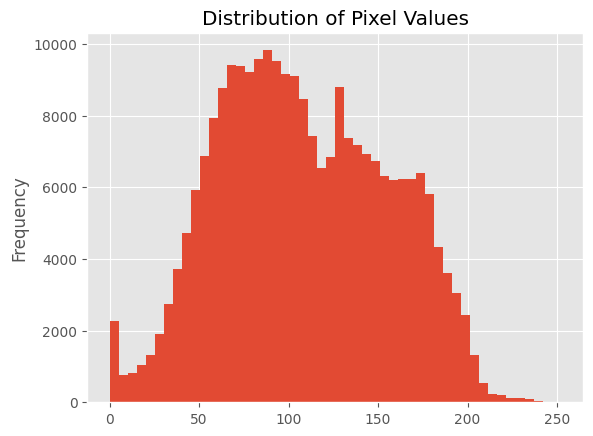

In [7]:
pd.Series(img_mpl.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

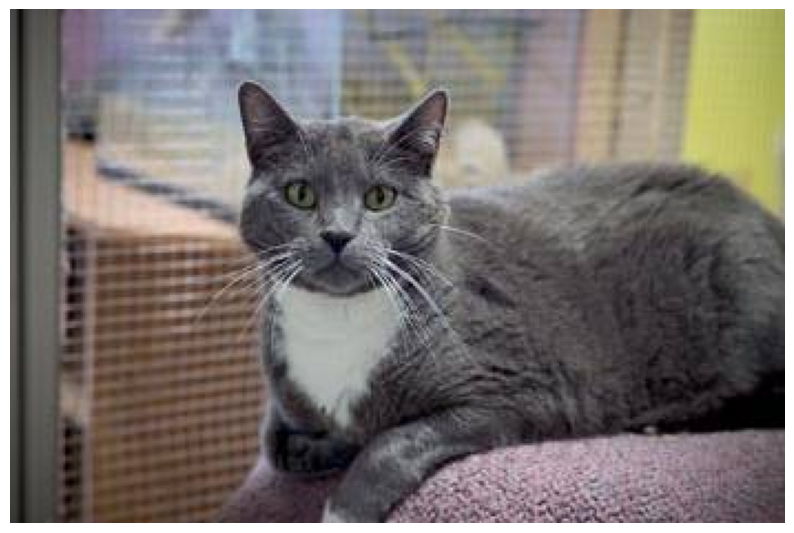

In [8]:
#Display Images

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

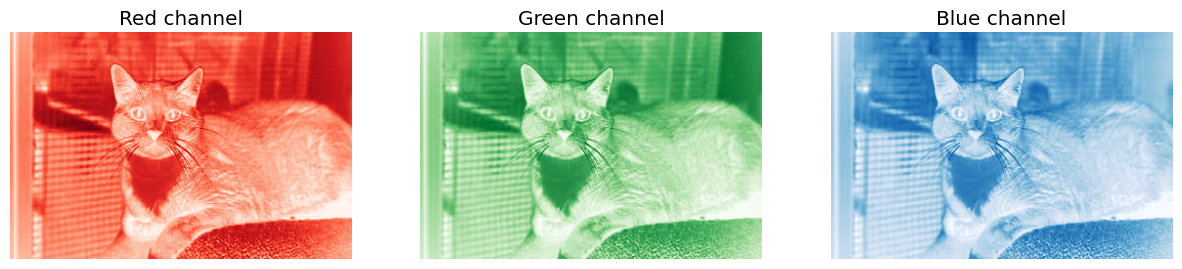

In [9]:
#Image Channels
# Display RGB Channels of our image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

**Matplotlib vs cv2 Numpy Arrays
cv2 reads in channels as BGR
matplotlib reads in channels as RGB******

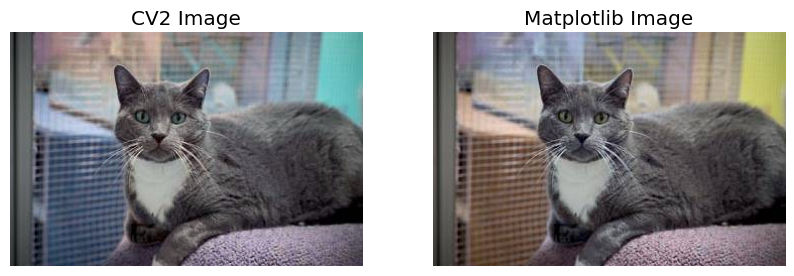

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')
plt.show()

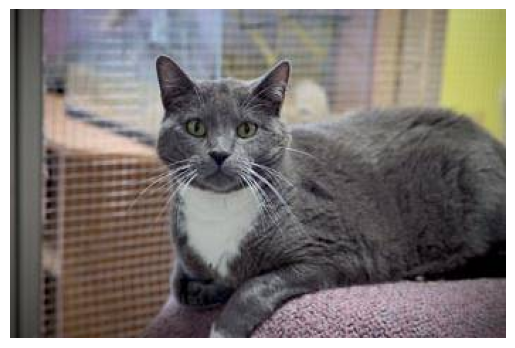

In [11]:
# Converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

**Image Manipulation**

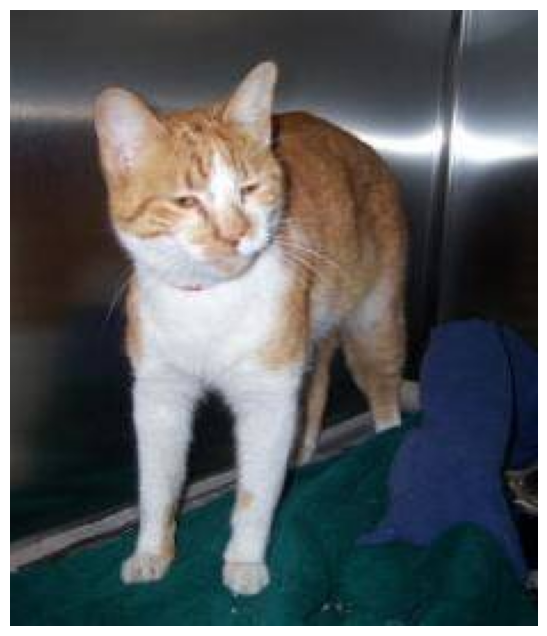

In [12]:
img = plt.imread(dog_files[4])
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.axis('off')
plt.show()

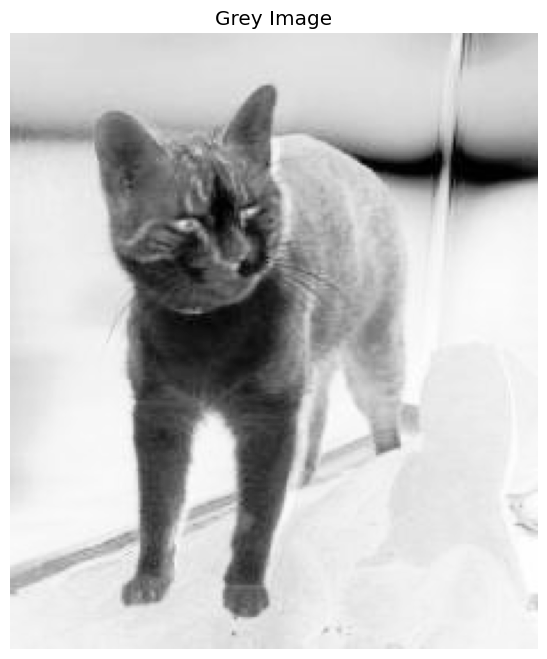

In [13]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

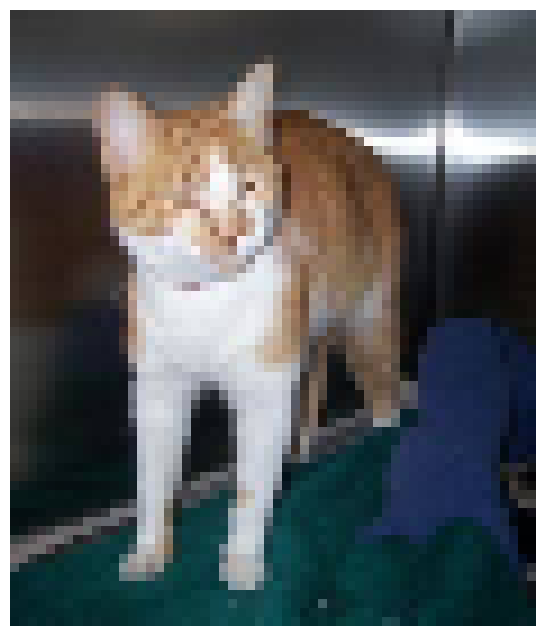

In [14]:
#Resizing and Scaling¶
img_resized = cv2.resize(img, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

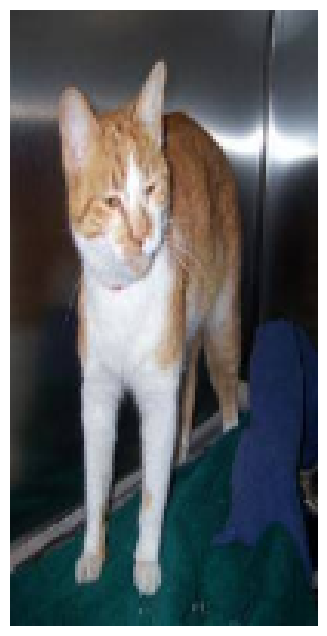

In [15]:
# Different Size
img_resize = cv2.resize(img, (100, 200))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

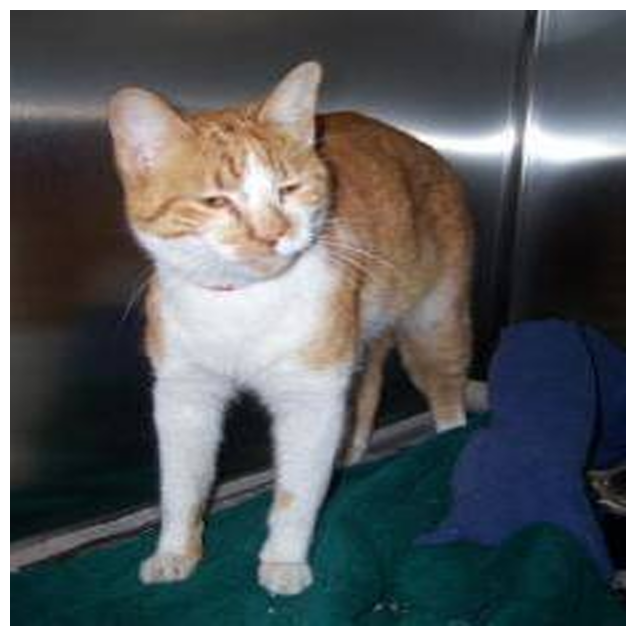

In [16]:
img_resize = cv2.resize(img, (5000, 5000), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

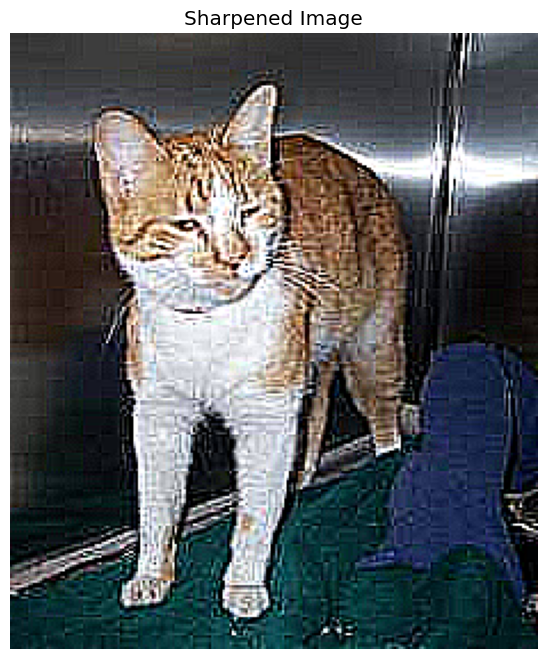

In [17]:
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

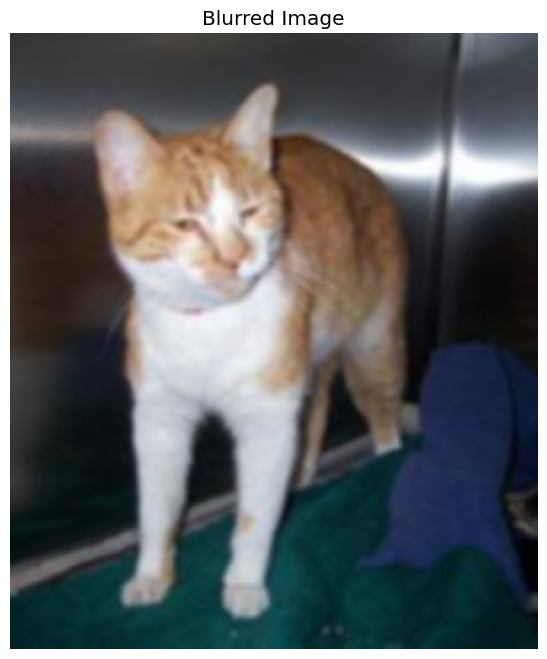

In [18]:
# Blurring the image
kernel_3x3 = np.ones((3, 3), np.float32) / 9
blurred = cv2.filter2D(img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

# #Save Images

In [19]:
plt.imsave('mpl_dog.png', blurred)
cv2.imwrite('cv2_dog.png', blurred)

True